In [2]:
from slsim.Sources.supernovae import delaytimedistribution
from slsim.Sources.supernovae import volumetricSNrate
from slsim.Sources.supernovae import supernovatotal
import numpy as np
x=np.arange(0,13.5,.5)
print(delaytimedistribution(x),"\n",volumetricSNrate(x),"\n",supernovatotal(x))

[0.         2.04       1.02       0.68       0.51       0.408
 0.34       0.29142857 0.255      0.22666667 0.204      0.18545455
 0.17       0.15692308 0.14571429 0.136      0.1275     0.12
 0.11333333 0.10736842 0.102      0.09714286 0.09272727 0.08869565
 0.085      0.0816     0.07846154] 
 [0.         0.04461127 0.04419298 0.04216875 0.03362405 0.02330166
 0.01526199 0.0099797  0.00666701 0.00458073 0.00323697 0.00234733
 0.00174198 0.00131942 0.00101755 0.00079737 0.00063377 0.00051016
 0.00041536 0.00034166 0.00028366 0.00023751 0.00020041 0.00017031
 0.00014567 0.00012535 0.00010847] 
 [0.00000000e+00 2.93949331e+12 1.03233751e+13 1.88109480e+13
 2.52973003e+13 2.92525870e+13 3.14577067e+13 3.26712290e+13
 3.33525133e+13 3.37471087e+13 3.39833991e+13 3.41294912e+13
 3.42225179e+13 3.42833592e+13 3.43241221e+13 3.43520332e+13
 3.43715235e+13 3.43853778e+13 3.43953864e+13 3.44027241e+13
 3.44081767e+13 3.44122790e+13 3.44154008e+13 3.44178015e+13
 3.44196658e+13 3.44211267e+13 3.44

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58]


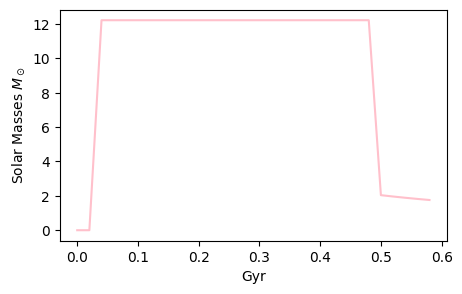

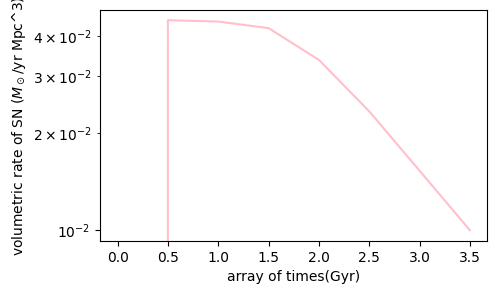

[ 2.12  2.62  3.12  3.62  4.12  4.62  5.12  5.62  6.12  6.62  7.12  7.62
  8.12  8.62  9.12  9.62 10.12 10.62 11.12 11.62 12.12 12.62]


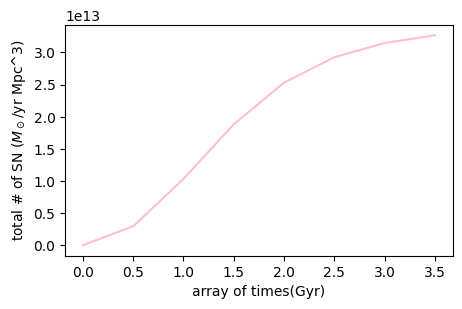

In [4]:
"graphing delay time distribution piecewise as a function of time"
from slsim.Sources.supernovae import delaytimedistribution
from slsim.Sources.supernovae import volumetricSNrate
from slsim.Sources.supernovae import supernovatotal
import numpy as np
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
x=np.arange(0,.6,.02)
print(x)
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
b=delaytimedistribution(x)
plt.xlabel('Gyr')
plt.ylabel('Solar Masses $M_\odot$')
plt.plot(x, b, '-', color='pink')
plt.show()

#current output follows the literacy, computes as a function of Gyr but "graphs" as a function of redshift"
Volumetric_Gyr=np.arange(2.12,13.09,.5)
test_redshifts=[0,0.5,1,1.5,2,2.5,3,3.5]
plt.figure(figsize=(5,3))
Lookback_volumetric_Gyr=np.arange(13.09,2.11,-.5)
redshift=z_at_value(Planck13.age, Lookback_volumetric_Gyr*u.Gyr)
rate3=volumetricSNrate(test_redshifts)
plt.xlabel('array of times(Gyr)')
plt.ylabel("volumetric rate of SN ($M_\odot$/yr Mpc^3)")
plt.semilogy(test_redshifts,rate3, '-', color='pink')
plt.show()

total_Gyr=np.arange(2.12,13.09,.5)
print(total_Gyr)
plt.figure(figsize=(5,3))
total=supernovatotal(test_redshifts)
#plt.yscale("log")
plt.xlabel('array of times(Gyr)')
plt.ylabel("total # of SN ($M_\odot$/yr Mpc^3)")
plt.plot(test_redshifts,total, '-', color='pink')
plt.show()



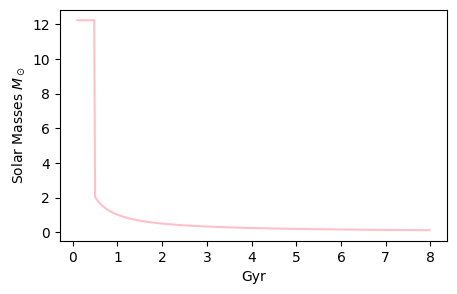

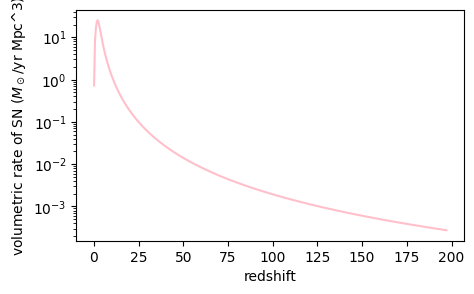

In [8]:

import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
import math
import scipy.constants
from astropy.cosmology import FlatLambdaCDM
from slsim.Sources.supernovae import delaytimedistribution

def volumetricSNrate(t, d):
    upper_limit = t - d
    t = np.atleast_1d(t)
    result = np.empty_like(t)
    val_min = 0

    def StarFormationHist(upper_limit):
        upper_limit = np.atleast_1d(upper_limit)
        redshift_array = []

        for i in upper_limit:
            try:
                z = z_at_value(Planck13.age, i * u.Gyr, zmin=1e-4, zmax=10000)
            except Exception:
                # If z_at_value fails, use an approximate redshift or skip this value
                z = np.nan  # Using NaN to indicate failed calculation
            s = 0.015 * (1 + i)**2.7 / (1 + ((1 + i) / 2.9)**5.6)
            redshift_array.append(s)

        return np.array(redshift_array)

    for i, val in enumerate(t):
        star_formation_history = StarFormationHist(upper_limit[i])

        if isinstance(val, (int, float)):
            integrand = star_formation_history * delaytimedistribution(d)
            integral_result = integrate.simps(integrand, dx=val - val_min)
            result[i] = integral_result
        elif isinstance(val, np.ndarray):
            integrand = star_formation_history * delaytimedistribution(d)
            integral_result = integrate.simps(integrand, dx=val - val_min)
            result[i] = integral_result

        val_min = val

    return result

def supernovatotal(z, x):
    pi = math.pi
    c = scipy.constants.speed_of_light
    cosmo = FlatLambdaCDM(H0=73, Om0=0.3)
    H0 = cosmo.H(z)
    d = cosmo.angular_diameter_distance(z)
    E = H0 / cosmo.H0
    SuperNovaRate = (((4 * pi) * (c / H0)) * (((1 + z)**2 * (d**2)) / E) * (1 / (1 + z))) * volumetricSNrate(z, x)
    return SuperNovaRate

DTD_values = np.arange(.1, 8, 0.02)
plt.figure(figsize=(5,3))
b=delaytimedistribution(DTD_values)
plt.xlabel('Gyr')
plt.ylabel('Solar Masses $M_\odot$')
plt.plot(DTD_values, b, '-', color='pink')
plt.show()

Gyr_time=np.arange(.12,197.5,.5)
Lookback_Gyr=np.arange(13.09,.12,-.5)
test_redshifts=[0,0.5,1,1.5,2,2.5,3,3.5]
plt.figure(figsize=(5,3))
redshifts=z_at_value(Planck13.age,Lookback_Gyr*u.Gyr)
rate_2r=volumetricSNrate(Gyr_time,DTD_values)
plt.xlabel('redshift')
plt.ylabel("volumetric rate of SN ($M_\odot$/yr Mpc^3)")
plt.semilogy(Gyr_time,rate_2r, '-', color='pink')
#plt.yscale("log")
#plt.loglog()
plt.show()

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58]


C:\Users\ronan\AppData\Local\Temp\ipykernel_22556\1047957345.py:24: RuntimeWarning: divide by zero encountered in divide
  result = np.where(x < 0.04, 0, np.where(x < 0.5, 12.2196, 1.02/x))


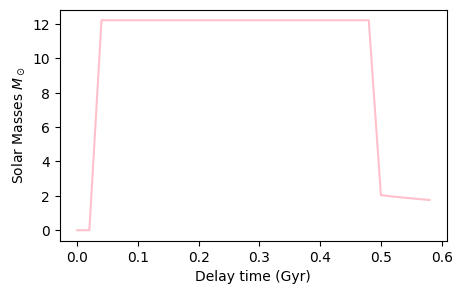

[0.01060421 0.00881221 0.01027756 0.01204108 0.01417783 0.01678585
 0.01999439 0.0239756  0.02896106 0.00586448 0.00630311 0.00687319
 0.00759689 0.00850295 0.00962478 0.01099431 0.01262631 0.0144841
 0.01641647 0.0180736  0.01887405 0.01817863 0.01571509 0.01187534]


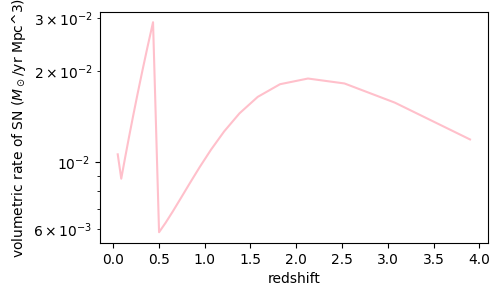

[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]


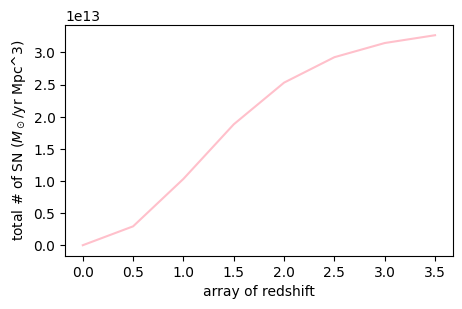

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from slsim.Sources.supernovae import delaytimedistribution, supernovatotal
from astropy.cosmology import Planck13, z_at_value
import astropy.units as u
from scipy import interpolate
import scipy.constants
import math
import astropy.cosmology
from astropy.cosmology import FlatLambdaCDM
"DTD as a function of x=time where input is either single value or a numPy array"
def delaytimedistribution(x):
    if isinstance(x, (int, float)):
        "checks if input is a single value"
        if x<0.04:
            return 0
        elif x<0.5:
            return 12.2196
        else:
            return 1.02/x
    elif isinstance(x, np.ndarray):
        "checks if input is an array"
        result = np.where(x < 0.04, 0, np.where(x < 0.5, 12.2196, 1.02/x))
        return result
    else:
        raise ValueError("input must be single value or numpy array")

def volumetricSNrate(z):
    cosmo=FlatLambdaCDM(H0=73, Om0=0.3)
    "takes in some numpy array of times representing time since beginning of universe"
    z=np.atleast_1d(z)
    "checks that the input as at least 1 computable numpy value"
    result = np.empty_like(z)
    "creates an empty array with the same shape as our input array"
    val_min = 0
    "sets min value for integration which changes for every iteration of the loop"
    def StarFormationHist(ti):
        "describes the cosmic star formation rates based on UV and IR band observations"
        ti = np.atleast_1d(ti)  
        "checks that the input has at least 1 computable numpy value"
        redshift_array = np.zeros_like(ti)
        "creates an empty array with the same shape as our input array"
        for i, t in enumerate(ti):
            "correspondence between time and redshift using z_at_value"
            s = 0.015 * (1 + t)**2.7 / (1 + ((1 + t) / 2.9)**5.6)
            "equation of star formation history as a function of redshift"
            redshift_array[i] = s
            "assigns starformationhist result to the appropriate index in the array"
        return redshift_array
        "returns rounded off numpy array" 
    for i, val in enumerate(z):
        "loops run through array of T values to calculate each StarFormationHist and then integral at that T."
        star_formation_history = StarFormationHist(val)
        "sets star_formation_hist to just the values so that it is iterable during integration" 
        if isinstance(val, (int, float)):
            "checks if input is a single value"
            integral_result, _ = integrate.quad(lambda ti: star_formation_history * delaytimedistribution(val), val_min, val)
            result[i] = integral_result
            "integrates and then appends at current i index that result to the array intialized outside the loop"
        elif isinstance(val, np.ndarray):
            "checks if input is an array"
            integral_result, _ = integrate.quad(lambda ti:star_formation_history * delaytimedistribution(val), val_min, val)
            result[i] = integral_result
            "integrates and then appends at current i index that result to the array intialized outside the loop"
        val_min = val
        "sets new bounds by taking in the old max val as the new min value in order to integrate by parts"
    return result

def supernovatotal(z):
    #check input is at least one value and initialize a final return array 
    z = np.atleast_1d(z)
    total = np.zeros_like(z)
    # Define constants
    pi = math.pi
    c = scipy.constants.speed_of_light
    # Define cosmological model
    cosmo = FlatLambdaCDM(H0=73, Om0=0.3)
    for i, t in enumerate(z):
        # Calculate Hubble parameter and angular diameter distance at redshift z
        H0 = cosmo.H(t).value  # Extract the value from the Astropy Quantity
        d = cosmo.angular_diameter_distance(t).value  # Extract the value from the Astropy Quantity
        # Calculate dimensionless Hubble parameter
        E = H0 / cosmo.H0.value
        # Calculate the supernova rate for the given redshift
        SuperNovaRate = (((4 * pi) * (c / H0)) * (((1 + t)**2 * (d**2)) / E) * (1 / (1 + t))) * volumetricSNrate(t)
        total[i] = SuperNovaRate
        cumulativeresult=np.cumsum(total)
    #Total Number of Supernova as a function of redshift
    return cumulativeresult

x=np.arange(0,.6,.02)
print(x)
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
b=delaytimedistribution(x)
plt.xlabel('Delay time (Gyr)')
plt.ylabel('Solar Masses $M_\odot$')
plt.plot(x, b, '-', color='pink')
plt.show()


Lookback_Gyr2=np.arange(13.09,1.12,-.5)
redshifts2=z_at_value(Planck13.age,Lookback_Gyr2*u.Gyr)
rate_3r=volumetricSNrate(redshifts2)
print(rate_3r.value)
plt.figure(figsize=(5,3))
plt.xlabel('redshift')
plt.ylabel("volumetric rate of SN ($M_\odot$/yr Mpc^3)")
plt.semilogy(redshifts2,rate_3r, '-', color='pink')
plt.show()

test_redshifts=[0,0.5,1,1.5,2,2.5,3,3.5]
print(test_redshifts)
plt.figure(figsize=(5,3))
d=supernovatotal(test_redshifts)
plt.xlabel('array of redshift')
plt.ylabel("total # of SN ($M_\odot$/yr Mpc^3)")
plt.plot(test_redshifts, d, '-', color='pink')
plt.show()

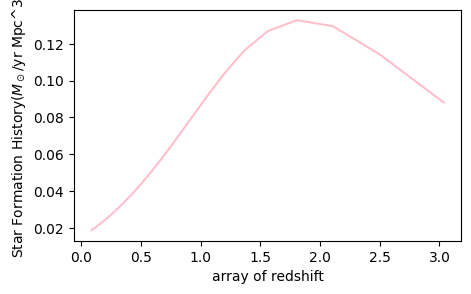

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from slsim.Sources.supernovae import delaytimedistribution, supernovatotal
from astropy.cosmology import Planck13, z_at_value
import astropy.units as u
from scipy import interpolate
import scipy.constants

def StarFormationHist(ti):
    "describes the cosmic star formation rates based on UV and IR band observations"
    ti = np.atleast_1d(ti)  
    "checks that the input has at least 1 computable numpy value"
    redshift_array = np.zeros_like(ti)
    "creates an empty array with the same shape as our input array"
    for i, t in enumerate(ti):
        "correspondence between time and redshift using z_at_value"
        s = 0.015 * (1 + t)**2.7 / (1 + ((1 + t) / 2.9)**5.6)
        "equation of star formation history as a function of redshift"
        redshift_array[i] = s
        "assigns starformationhist result to the appropriate index in the array"
    return redshift_array

Gyr2 = np.arange(2.12, 13.09, 0.5)
redshift = z_at_value(Planck13.age, Gyr2*u.Gyr)
rate_r = StarFormationHist(redshift)
plt.figure(figsize=(5,3))
d=StarFormationHist(redshift)
plt.xlabel('array of redshift')
plt.ylabel("Star Formation History($M_\odot$/yr Mpc^3)")
plt.plot(redshift, d, '-', color='pink')
plt.show()
